In [1]:
!pip install tensorflow



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras 

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import numpy as np

In [7]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [8]:
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)  
print("X_test shape:", X_test.shape)    
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


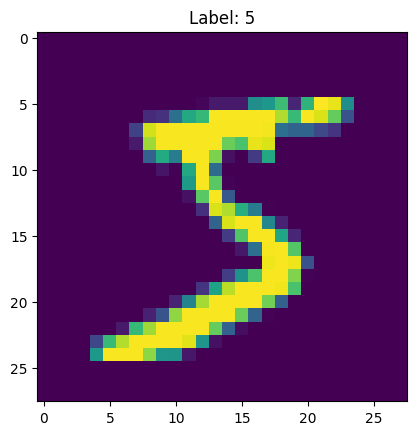

In [9]:
plt.imshow(X_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

In [10]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [27]:
#X_train[0]

In [12]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [30]:

X_train_flattened.shape

(60000, 784)

In [31]:
X_test_flattened.shape

(10000, 784)

In [32]:
model=keras.Sequential([

    keras.layers.Dense(10,input_shape=(784,),activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8191 - loss: 0.7102
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9126 - loss: 0.3165
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9207 - loss: 0.2813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9231 - loss: 0.2791
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9280 - loss: 0.2578


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9151 - loss: 0.3008


[0.26664403080940247, 0.9259999990463257]

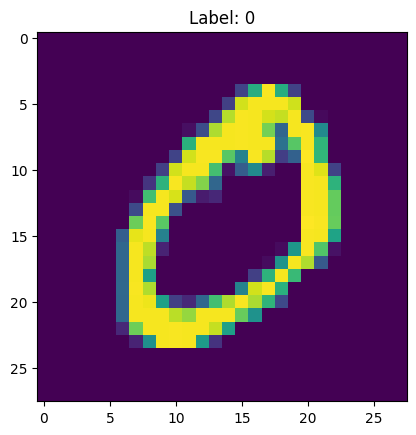

In [16]:
plt.imshow(X_train[1])
plt.title(f"Label: {y_train[1]}")
plt.show()

In [17]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


In [18]:
y_predicted[8]

array([1.58763677e-01, 5.84368490e-06, 1.17508955e-02, 1.97174404e-06,
       5.80341935e-01, 4.52512115e-01, 9.99307275e-01, 3.12738081e-07,
       1.36653543e-01, 2.17083201e-04], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [24]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    6,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,   10,  907,   18,   13,    4,   13,   11,   45,    3],
       [   3,    0,   13,  924,    0,   23,    3,   11,   27,    6],
       [   2,    1,    2,    1,  927,    0,   11,    3,   11,   24],
       [   9,    3,    1,   35,   10,  774,   15,    6,   33,    6],
       [   9,    3,    5,    1,    7,   12,  916,    2,    3,    0],
       [   1,    6,   19,    9,    9,    0,    0,  950,    4,   30],
       [   5,    7,    5,   20,    9,   21,    8,   12,  881,    6],
       [  10,    7,    1,   10,   37,    6,    0,   25,    9,  904]])>

In [25]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8694 - loss: 0.4668
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9615 - loss: 0.1302
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9747 - loss: 0.0864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9804 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0494


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9701 - loss: 0.0929


[0.08106400072574615, 0.9746000170707703]